In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from bandit import EpsilonGreedy, UCB, Softmax, ThompsonSampling, WebServer

In [12]:
# 実験設定
## 腕の数
n_arm = 50

## ラウンド回数
T = 1000

## シミュレーション回数
n_sim = 250

## epsilon
range_epsilon = [0.3, 0.6]

## softmax の tau
range_tau = [0.5, 1.0, 1.5]

## TS方策の事前分布 (無情報)
alpha, beta = 1., 1.

In [13]:
## 時刻ごとにサイトに訪れたユーザーリクエストに応じて、アクションをレスポンスして報酬を受け取るwebサーバー
web_server = WebServer(n_arm=n_arm)

In [14]:
results = defaultdict(lambda: defaultdict(list))


for _ in range(n_sim):
    # Epsilon Greedy
    for epsilon in range_epsilon:
        model = EpsilonGreedy(n_arm=n_arm, T=T, epsilon=epsilon)
        metrics = model.run(web_server)
        
        model_name = f"EpsilonGreedy_{epsilon}"
        for metric_name, metric_values in metrics.items():
            results[model_name][metric_name].append(metric_values)
    
    # UCB
    model = UCB(n_arm=n_arm, T=T)
    metrics = model.run(web_server)
    
    model_name = "UCB"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)
    
    
    # Softmax
    for tau in range_tau:
        model = Softmax(n_arm=n_arm, T=T, tau=tau)
        metrics = model.run(web_server)
        
        model_name = f"Softmax_{tau}"
        for metric_name, metric_values in metrics.items():
            results[model_name][metric_name].append(metric_values)
        
    
    # ThompsonSampling
    model = ThompsonSampling(n_arm=n_arm, T=T, alpha=alpha, beta=beta)
    metrics = model.run(web_server)
    
    model_name = "ThmpsonSampling"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)


mean_results = defaultdict(dict)
for policy_name, metrics in results.items():
    for metric_name, metric_values in metrics.items():
        mean_results[metric_name][policy_name] = np.array(metric_values).mean(0)

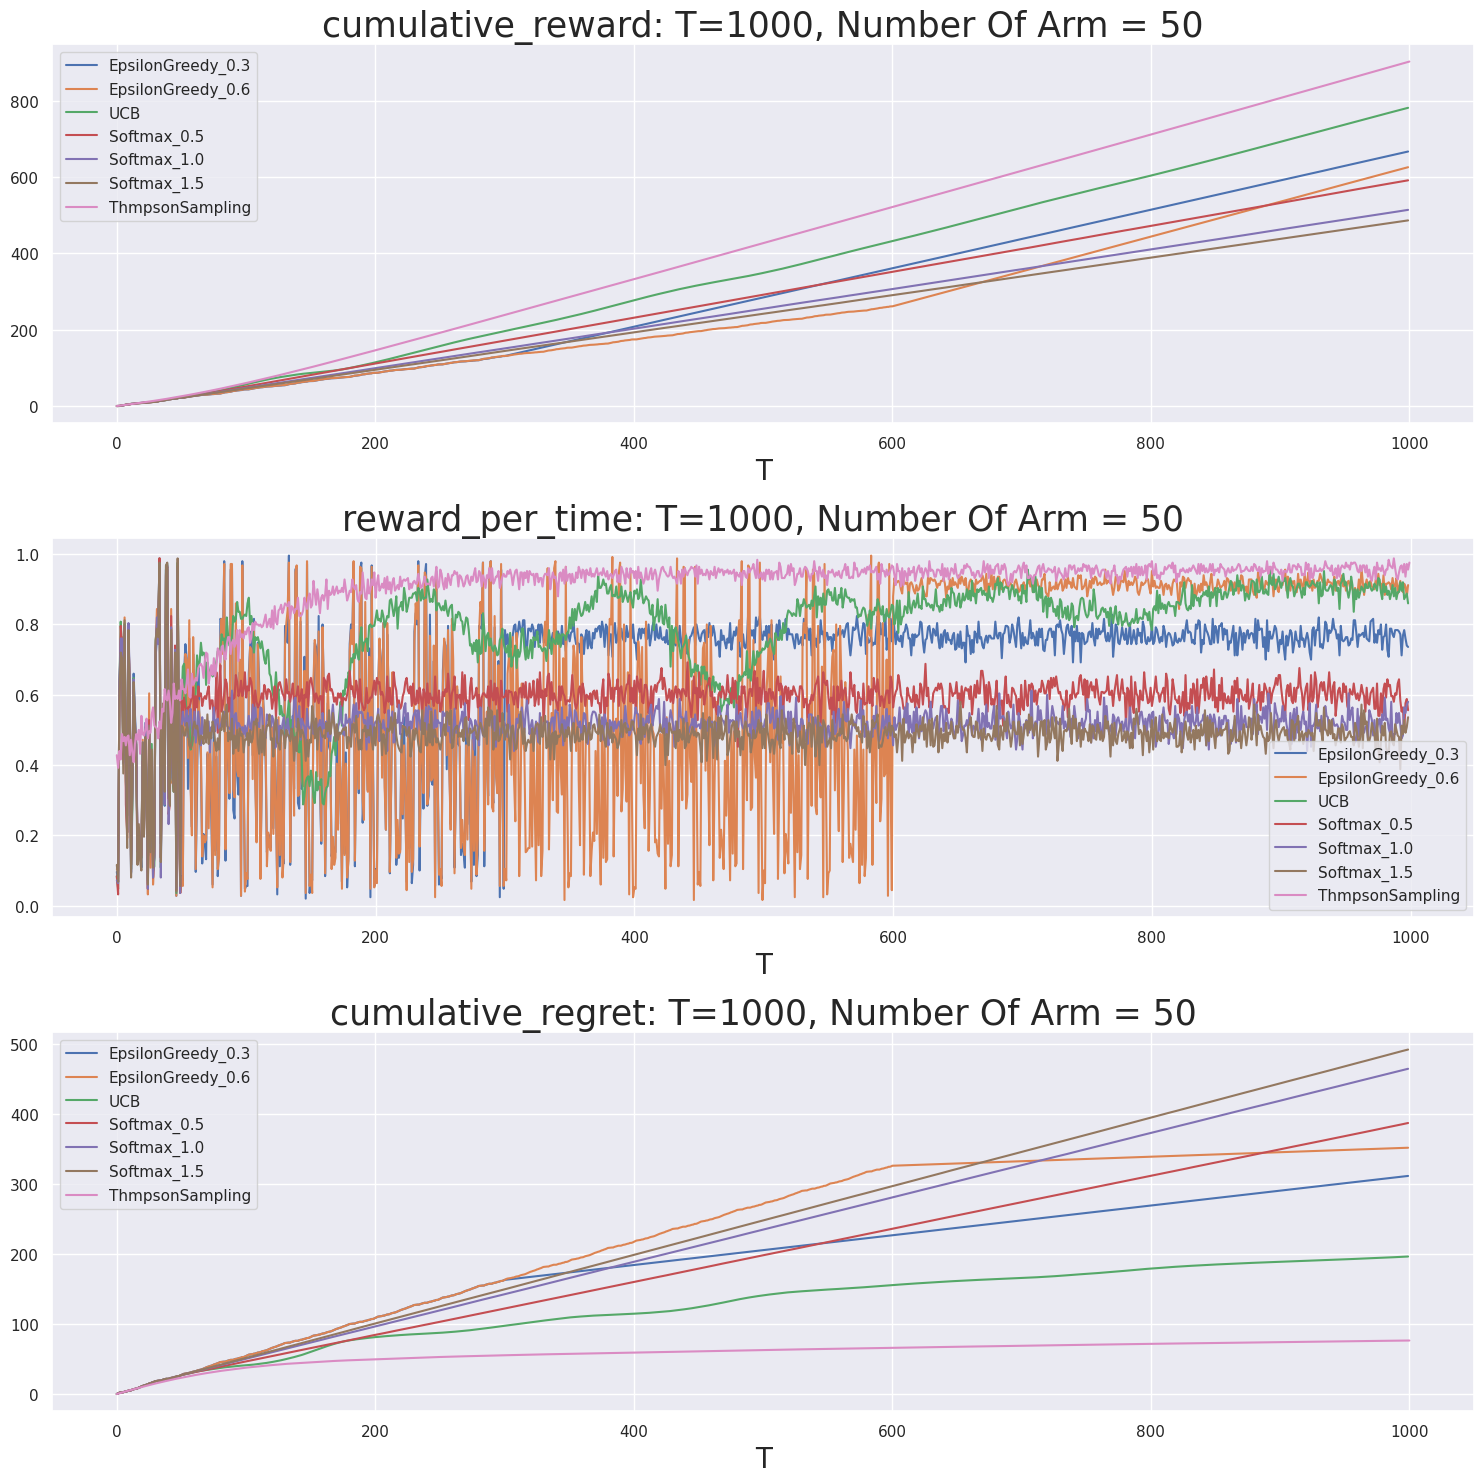

In [15]:
# plot
plt.figure(figsize=(15,15))

for index, metric_name in enumerate(mean_results):
    plt.subplot(3, 1, index + 1)
    plt.title(f'{metric_name}: T={T}, Number Of Arm = {n_arm}', fontsize=25)
    
    for policy_name, metric_values in mean_results[metric_name].items():
        plt.plot(metric_values, label=policy_name)
        
    plt.xlabel('T', fontsize=20)
    plt.legend()
    plt.tight_layout()

        
plt.show()
    